In [34]:
import pickle
import numpy as np
#py2_2_parking_loop_straight_20_32_19.pkl
with open('/Users/owenburns/workareas/cavrel-platooning/missions/datapoints/py3_1_parking_loop_straight_19_24_19.pkl', 'rb') as f:
    data = pickle.load(f)#, encoding='latin1') # latin1 is essential for loading python2 pickle files. Not necessary for python3 files
cars = [np.array(car) for car in zip(*data)]

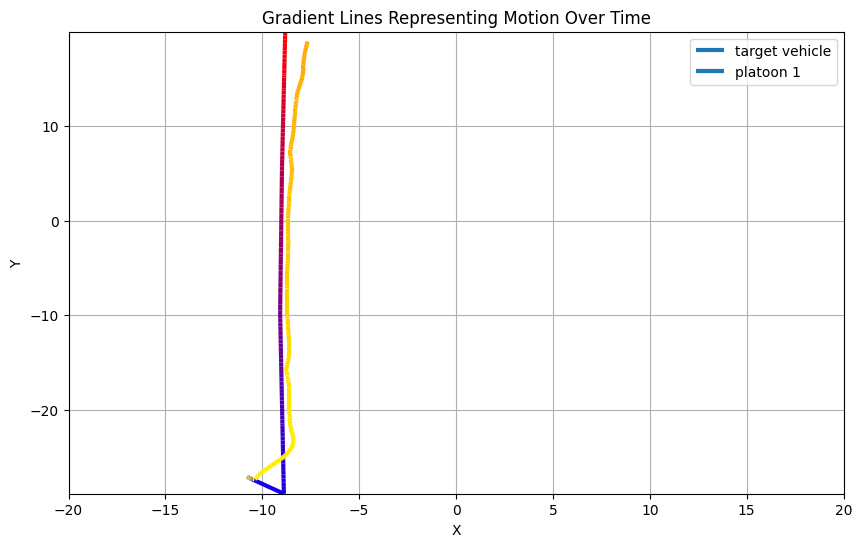

In [36]:

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap

def plot_gradient_lines(xs, ys, colors, label=None):
    # Prepare points for line collection
    points = np.array([xs, ys]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    # Create a continuous linear colormap
    cmap = LinearSegmentedColormap.from_list("mycmap", colors)

    # Setting up the LineCollection
    lc = LineCollection(segments, cmap=cmap, linewidth=3)
    # Set the values used for colormapping
    lc.set_array(np.linspace(0, 1, len(xs)))
    lc.set_label(label)

    # Adding the collection to the plot
    plt.gca().add_collection(lc)

xs1 = cars[0][:, 0]
ys1 = cars[0][:, 1]

xs2 = cars[1][:, 0]
ys2 = cars[1][:, 1]

# xs3 = cars[2][:, 0]
# ys3 = cars[2][:, 1]

plt.figure(figsize=(10, 6))
# fig, ax = plt.subplots(2, 1, figsize=(10, 14))

# Plot each line with gradients
plot_gradient_lines(xs1, ys1, ["blue", "red"], label='target vehicle')
plot_gradient_lines(xs2, ys2, ["yellow", "orange"], label='platoon 1')
# plot_gradient_lines(xs3, ys3, ["green", "purple"], label='platoon 2')
# plt.xlim(min(xs1.min(), xs2.min()), max(xs1.max(), xs2.max()))
plt.ylim(min(ys1.min(), ys2.min()), max(ys1.max(), ys2.max()))
plt.xlim(-20,20)
# plt.ylim(-40,40)

plt.legend()
plt.title('Gradient Lines Representing Motion Over Time')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


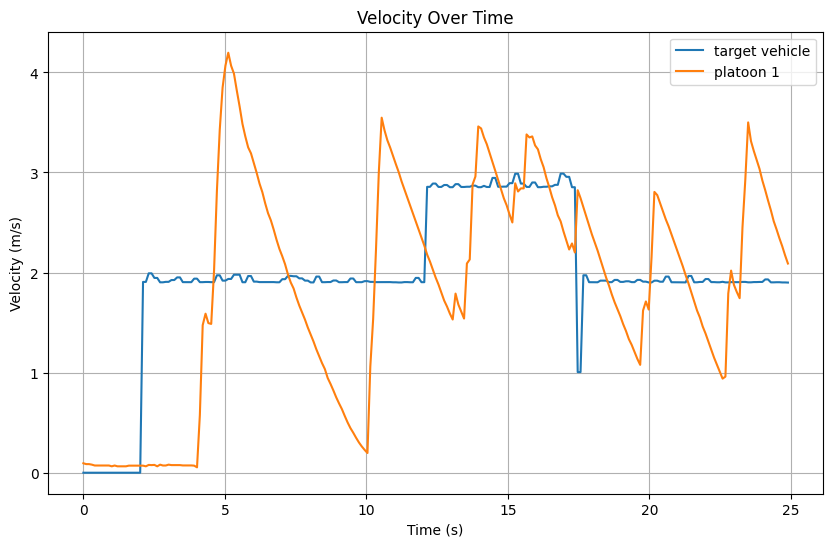

In [38]:
from scipy.signal import savgol_filter
window_size = 99  # Window size must be odd
poly_order = 2   # Polynomial order
# plot all car velocities over time
time = np.linspace(0, 0.1*len(xs1), len(xs1))
plt.figure(figsize=(10, 6))

car0_v = cars[0][:,3]
car1_v = cars[1][:,3]
# car2_v = cars[2][:,3]
# car0_v = savgol_filter(car0_v, window_size, poly_order)
# car1_v = savgol_filter(car1_v, window_size, poly_order)
# car2_v = savgol_filter(car2_v, window_size, poly_order)

plt.plot(time, car0_v, label='target vehicle')
plt.plot(time, car1_v, label='platoon 1')
# plt.plot(time, car2_v, label='platoon 2')
plt.legend()
plt.title('Velocity Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.grid(True)
plt.show()
# note: stop and start behavious b4 5th trial is bc lead vehicle kept catching up. Once we were dropping half the messages it always thought it was still behind so it never stopped

In [ ]:
import numpy as np

a=2*10**-1
b=2*10**-3
xc=
x = ()